In [1]:
%load_ext watermark
%watermark

2019-05-24T11:04:40+01:00

CPython 3.6.8
IPython 7.5.0

compiler   : GCC 7.3.0
system     : Linux
release    : 4.15.0-50-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


Vamos a aprender a usar pyspark, que es la version de python de [Apache Spark](https://spark.apache.org/), que es la libreria más popular hoy en dia para procesado de Big Data (y está desarrollado en Java). Hay otras versiones de Spark para distintos lenguages. Además de python, Spark soporta [Java](https://spark.apache.org/docs/latest/api/java/index.html), [Scala](https://spark.apache.org/docs/latest/api/scala/index.html#package) o [R](https://spark.apache.org/docs/latest/sparkr.html).


**Instalar spark**

Dadas las dependencias de spark, es mas complicado de instalar que un paquete de python normal. En concreto necesitamos:

- Java version 8
- la libreria de spark de java instalada
- el paquete de python pyspark (disponible en conda-forge)

[Aqui](https://medium.com/datos-y-ciencia/c%C3%B3mo-usar-pyspark-en-tu-computadora-dee7978d1a40) hay un tutorial bastante decente para Linux y Mac.

[Aqui](https://medium.com/@dvainrub/how-to-install-apache-spark-2-x-in-your-pc-e2047246ffc3) un tutorial para instalar en windows (en inglés)

In [1]:
from IPython.display import Image

Spark funciona mediante el uso de un Cluster distribuido, que no es más que un grupo de ordenadores (generalmente en la nube) que trabajan de forma conjunta, esto permite computar datasets más grandes que la memoria de cualquiera de las máquinas del cluster.

Un cluster de Spark se compone de los siguientes componentes.

- Driver (director): Este es el ordenador desde donde ejecutamos el codigo de Spark, probablemente nuestro ordenador personal.
- Workers: Estas máquinas son las que se encargan de realizar las computaciones, es decir, el trabajo. Cada Worker (que es una máquina distinta) tiene múltiples Executors (ejecutores). Cada ejecutor realiza una operacion a la vez. Por ejemplo, si cada Worker tiene 4 CPUs podría tener 4 ejecutores.
- Manager (gestor): También llamado *master*. Esta máquina se encarga de recibir peticiones del Driver y gestionar el trabajo entre los Workers (trabajadores)

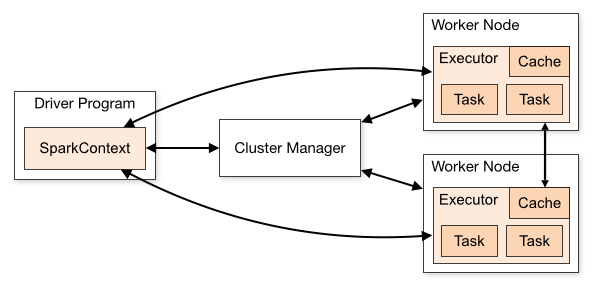

In [3]:
Image("../../media/cluster-overview.png")

Spark tambien funciona con un ordenador sólo, usando todos los procesadores de nuestro ordenador para crear un "cluster".

Si queremos probar el uso de un cluster distribuido sin tener que pagar, podemos hacer uso de la versión gratuita de [DataBricks](https://community.cloud.databricks.com). Éste cluster es un cluster muy pequeño y solo dura un tiempo muy pequeño, asi que al acabar de trabajar perderemos el código que ejecutemos.

Para usar spark tenemos que crear una sesion de spark, `SparkSession`.

Usamos el método `SparkSession.builder.getOrCreate()` que si no existe una sesion de spark crea una, y si no devuelve la que se ha creado, esto es así por que sólo se pùede tener una sesión de spark abierta en una aplicación (en un notebook). 

Al crear la sesión podemos usar multiples argumentos concadenado:

- `master`: indica la direccion del manager del cluster. Si tuviesemos un cluster en la nube el master sería la ip del master. Como vamos a trabajar en local (en nuestro ordenador), usaremos `local`. Al usar como master el ordenador local podemos especificar cuantos cores queremos que use spark:
    - con master=local, spark usa 1 solo core.
    - con master=local[*], spark usa todos los cores de nuestro ordenador, esto significa que según que aplicaciones nos podemos quedar sin memoria (RAM).
    - con master=local[3], (siendo 3 cualquier numero), spark usaria 3 cores como máximo.
    
- `appName`: indica el nombre de nuestra aplicacion. Esto es util si trabajamos con un cluster compartido donde hay múltiples trabajos de spark a la vez, para poder identificar el nuestro.
- `config`: Spark tiene una cantida inmensa de parámetros de configuración, los clusters tienen unos valores por defecto, pero podemos modificarlos para nuestra aplicación pasandolos al crear la `SparkSession`.

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
     .master("local[*]") \
     .appName("Nuestra app") \
     .config("spark.some.config.option", "some-value") \
     .getOrCreate()

Podemos ir a la interfaz web haciendo click en *Spark UI*

In [3]:
spark

Desde la sesión de spark, podemos leer datos de muchos tipos de inputs. Por ejemplo, podemos leer el dataset de taxis de 2014 en formato parquet:

In [4]:
taxi = (
    spark
    .read
    .load("../data/nyc_taxi_data_2014.parquet/")
)

taxi

DataFrame[vendor_id: string, pickup_datetime: string, dropoff_datetime: string, passenger_count: bigint, trip_distance: double, pickup_longitude: double, pickup_latitude: double, rate_code: bigint, store_and_fwd_flag: string, dropoff_longitude: double, dropoff_latitude: double, payment_type: string, fare_amount: double, surcharge: double, mta_tax: double, tip_amount: double, tolls_amount: double, total_amount: double]

In [5]:
type(taxi)

pyspark.sql.dataframe.DataFrame

In [6]:
taxi.columns

['vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'rate_code',
 'store_and_fwd_flag',
 'dropoff_longitude',
 'dropoff_latitude',
 'payment_type',
 'fare_amount',
 'surcharge',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'total_amount']

Podemos ver los tipos de datos del dataset con `printSchema()`

In [7]:
taxi.dtypes

[('vendor_id', 'string'),
 ('pickup_datetime', 'string'),
 ('dropoff_datetime', 'string'),
 ('passenger_count', 'bigint'),
 ('trip_distance', 'double'),
 ('pickup_longitude', 'double'),
 ('pickup_latitude', 'double'),
 ('rate_code', 'bigint'),
 ('store_and_fwd_flag', 'string'),
 ('dropoff_longitude', 'double'),
 ('dropoff_latitude', 'double'),
 ('payment_type', 'string'),
 ('fare_amount', 'double'),
 ('surcharge', 'double'),
 ('mta_tax', 'double'),
 ('tip_amount', 'double'),
 ('tolls_amount', 'double'),
 ('total_amount', 'double')]

In [8]:
taxi.printSchema()

root
 |-- vendor_id: string (nullable = true)
 |-- pickup_datetime: string (nullable = true)
 |-- dropoff_datetime: string (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- rate_code: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- surcharge: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- total_amount: double (nullable = true)



Podemos leer tambien de csvs

In [9]:
taxi_csv = spark.read.csv("../data/2017_Yellow_Taxi_Trip_Data.csv", header=True)

Sin embargo, ya que el formato csv no tiene tipos de datos (es texto), spark piensa que cada columna es un string por defecto

In [11]:
taxi_csv.dtypes

[('VendorID', 'string'),
 ('tpep_pickup_datetime', 'string'),
 ('tpep_dropoff_datetime', 'string'),
 ('passenger_count', 'string'),
 ('trip_distance', 'string'),
 ('RatecodeID', 'string'),
 ('store_and_fwd_flag', 'string'),
 ('PULocationID', 'string'),
 ('DOLocationID', 'string'),
 ('payment_type', 'string'),
 ('fare_amount', 'string'),
 ('extra', 'string'),
 ('mta_tax', 'string'),
 ('tip_amount', 'string'),
 ('tolls_amount', 'string'),
 ('improvement_surcharge', 'string'),
 ('total_amount', 'string')]

Si queremos, podemos hacer que spark scanee el archivo csv para inferir (adivinar) el tipo de datos (schema), esto implica que spark tiene que leer el archivo, lo cual tarda bastante más tiempo.

In [12]:
%%time
taxi_csv = (spark
                  .read
                  .csv(
                      "../data/2017_Yellow_Taxi_Trip_Data.csv",
                      header=True,
                      inferSchema=True
                  ))

CPU times: user 20.3 ms, sys: 8.59 ms, total: 28.9 ms
Wall time: 2min 25s


Ahora los tipos de datos son correctos

In [13]:
taxi_csv.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: string (nullable = true)
 |-- tpep_dropoff_datetime: string (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: double (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)



Podemos ver las primeras filas del dataset con `.head()`

In [14]:
taxi_csv.head(5)

[Row(VendorID=2, tpep_pickup_datetime='07/14/2017 11:52:17 PM', tpep_dropoff_datetime='07/15/2017 12:26:27 AM', passenger_count=1.0, trip_distance=6.62, RatecodeID='1', store_and_fwd_flag='N', PULocationID=230, DOLocationID=116, payment_type=1.0, fare_amount=27.5, extra=0.5, mta_tax=0.5, tip_amount=2.2, tolls_amount=0.0, improvement_surcharge=0.3, total_amount=31.0),
 Row(VendorID=1, tpep_pickup_datetime='07/14/2017 11:18:35 PM', tpep_dropoff_datetime='07/14/2017 11:30:45 PM', passenger_count=1.0, trip_distance=1.1, RatecodeID='1', store_and_fwd_flag='N', PULocationID=50, DOLocationID=164, payment_type=2.0, fare_amount=9.0, extra=0.5, mta_tax=0.5, tip_amount=0.0, tolls_amount=0.0, improvement_surcharge=0.3, total_amount=10.3),
 Row(VendorID=1, tpep_pickup_datetime='07/14/2017 11:14:23 PM', tpep_dropoff_datetime='07/14/2017 11:35:33 PM', passenger_count=1.0, trip_distance=4.3, RatecodeID='1', store_and_fwd_flag='N', PULocationID=113, DOLocationID=143, payment_type=1.0, fare_amount=18.0,

head devuelve una lista de [`Rows`](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.Row), que son objetos de spark

In [15]:
filas = taxi_csv.head(5)
filas[0]

Row(VendorID=2, tpep_pickup_datetime='07/14/2017 11:52:17 PM', tpep_dropoff_datetime='07/15/2017 12:26:27 AM', passenger_count=1.0, trip_distance=6.62, RatecodeID='1', store_and_fwd_flag='N', PULocationID=230, DOLocationID=116, payment_type=1.0, fare_amount=27.5, extra=0.5, mta_tax=0.5, tip_amount=2.2, tolls_amount=0.0, improvement_surcharge=0.3, total_amount=31.0)

In [16]:
type(filas)

list

In [17]:
type(filas[0])

pyspark.sql.types.Row

In [18]:
filas[0].VendorID

2

In [19]:
filas[0]["total_amount"]

31.0

Podemos convertir un `Row` en diccionario con `asDict()`

In [20]:
filas[0].asDict()

{'VendorID': 2,
 'tpep_pickup_datetime': '07/14/2017 11:52:17 PM',
 'tpep_dropoff_datetime': '07/15/2017 12:26:27 AM',
 'passenger_count': 1.0,
 'trip_distance': 6.62,
 'RatecodeID': '1',
 'store_and_fwd_flag': 'N',
 'PULocationID': 230,
 'DOLocationID': 116,
 'payment_type': 1.0,
 'fare_amount': 27.5,
 'extra': 0.5,
 'mta_tax': 0.5,
 'tip_amount': 2.2,
 'tolls_amount': 0.0,
 'improvement_surcharge': 0.3,
 'total_amount': 31.0}

In [21]:
taxi_csv.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+
|       2|07/14/2017 11:52:...| 07/15/2017 12:26:...|            1.0|         6.62|         1|                 N|         230|         116|         1.0|       27.5|  0.5|    0.5|       2.2|         0.0|                  0.3|        31.0|
|       1|07/14/2017 11:18:...| 07/14/2017 11:30

La funcion de spark show() es bastante limitada, podemos definir una funcion mejor

In [22]:
import pandas as pd

def show(df, n=10):
    display(pd.DataFrame(df.head(n), columns=df.columns))

In [23]:
show(taxi_csv)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,07/14/2017 11:52:17 PM,07/15/2017 12:26:27 AM,1.0,6.62,1,N,230,116,1.0,27.5,0.5,0.5,2.20,0.0,0.3,31.00
1,1,07/14/2017 11:18:35 PM,07/14/2017 11:30:45 PM,1.0,1.10,1,N,50,164,2.0,9.0,0.5,0.5,0.00,0.0,0.3,10.30
2,1,07/14/2017 11:14:23 PM,07/14/2017 11:35:33 PM,1.0,4.30,1,N,113,143,1.0,18.0,0.5,0.5,2.00,0.0,0.3,21.30
3,1,07/14/2017 11:05:17 PM,07/14/2017 11:21:24 PM,3.0,1.50,1,N,79,164,1.0,11.0,0.5,0.5,2.45,0.0,0.3,14.75
4,1,07/14/2017 11:52:02 PM,07/15/2017 12:07:10 AM,1.0,2.70,1,N,79,162,1.0,12.0,0.5,0.5,0.00,0.0,0.3,13.30
5,2,07/14/2017 11:10:32 PM,07/14/2017 11:21:39 PM,1.0,2.66,1,N,87,158,1.0,10.5,0.5,0.5,2.36,0.0,0.3,14.16
6,2,07/14/2017 11:28:26 PM,07/14/2017 11:34:05 PM,1.0,0.65,1,N,90,158,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16
7,2,07/14/2017 11:35:49 PM,07/14/2017 11:49:25 PM,1.0,1.60,1,N,158,211,1.0,10.0,0.5,0.5,2.26,0.0,0.3,13.56
8,2,07/14/2017 11:50:46 PM,07/15/2017 12:09:49 AM,1.0,4.38,1,N,211,181,1.0,17.0,0.5,0.5,3.66,0.0,0.3,21.96
9,1,07/14/2017 11:09:20 PM,07/14/2017 11:38:52 PM,1.0,7.10,1,N,114,143,2.0,25.5,0.5,0.5,0.00,0.0,0.3,26.80


Tambien podemos guardar en formato parquet, esto tarda bastante

In [25]:
%time taxi_csv.write.save("../data/2017_Yellow_Taxi_Trip_Data.2.parquet/", format="parquet")

CPU times: user 33.3 ms, sys: 8.73 ms, total: 42.1 ms
Wall time: 4min 39s


Podemos leer/escribir a muchos tipos distintos de archivos

In [ ]:
# json lines
# df.write.json('./data/nyc_taxi_data_2014_small.json/')

# csv, sin headers
# df.write.csv('./data/nyc_taxi_data_2014_small.csv/')

In [26]:
taxi = spark.read.load('../data/2017_Yellow_Taxi_Trip_Data.2.parquet/*.parquet')

In [27]:
taxi.head(5)

[Row(VendorID=1, tpep_pickup_datetime='12/24/2017 09:25:13 PM', tpep_dropoff_datetime='12/24/2017 09:41:16 PM', passenger_count=1.0, trip_distance=2.6, RatecodeID='1', store_and_fwd_flag='N', PULocationID=116, DOLocationID=167, payment_type=2.0, fare_amount=13.0, extra=0.5, mta_tax=0.5, tip_amount=0.0, tolls_amount=0.0, improvement_surcharge=0.3, total_amount=14.3),
 Row(VendorID=2, tpep_pickup_datetime='12/24/2017 08:54:08 PM', tpep_dropoff_datetime='12/24/2017 09:01:12 PM', passenger_count=2.0, trip_distance=0.84, RatecodeID='1', store_and_fwd_flag='N', PULocationID=239, DOLocationID=143, payment_type=1.0, fare_amount=5.5, extra=0.5, mta_tax=0.5, tip_amount=1.0, tolls_amount=0.0, improvement_surcharge=0.3, total_amount=7.8),
 Row(VendorID=2, tpep_pickup_datetime='12/24/2017 09:02:23 PM', tpep_dropoff_datetime='12/24/2017 09:05:04 PM', passenger_count=2.0, trip_distance=0.38, RatecodeID='1', store_and_fwd_flag='N', PULocationID=143, DOLocationID=143, payment_type=1.0, fare_amount=4.0,

In [28]:
%time taxi.count()

CPU times: user 1.84 ms, sys: 194 µs, total: 2.04 ms
Wall time: 916 ms


113496874

Podemos seleccionar columnas de dos formas, la "clásica" es con `select:

In [29]:
taxi.select(["tip_amount", "fare_amount"]).head()

Row(tip_amount=0.0, fare_amount=13.0)

Pero tambien podemos usar la sintaxis de pandas

In [30]:
taxi[["tip_amount", "fare_amount"
     ]].head(10)

[Row(tip_amount=0.0, fare_amount=13.0),
 Row(tip_amount=1.0, fare_amount=5.5),
 Row(tip_amount=1.32, fare_amount=4.0),
 Row(tip_amount=0.0, fare_amount=4.0),
 Row(tip_amount=0.0, fare_amount=7.5),
 Row(tip_amount=0.0, fare_amount=18.0),
 Row(tip_amount=2.95, fare_amount=13.5),
 Row(tip_amount=0.0, fare_amount=7.0),
 Row(tip_amount=0.0, fare_amount=52.0),
 Row(tip_amount=1.2, fare_amount=8.5)]

Tarda menos de un segundo en contar 113 millones de filas en formato parquet

## Resilient Distributed Datasets (RDD)

Spark almacena datos usando lo que llaman RDD (Resilient Distributed Datasets, o Datasets Resilientes distribuidos):

**Resiliente**, tolerante a fallos, es decir, que si tenemos datos distribuidos la perdida de una maquina en el cluster no significa que perdemos los datos almacenados en ella

**Distribuido**, los datos no están solo en una máquina, sino en varias.

**Dataset** un conjunto de elementos particionados

Hay dos formas principales de crear RDDs: paralelizar un conjunto de elementos (una lista por ejemplo) o mediante la lectura de un dataset distribuido (por ejemplo, leyendo un monton de archivos en formato parquet.

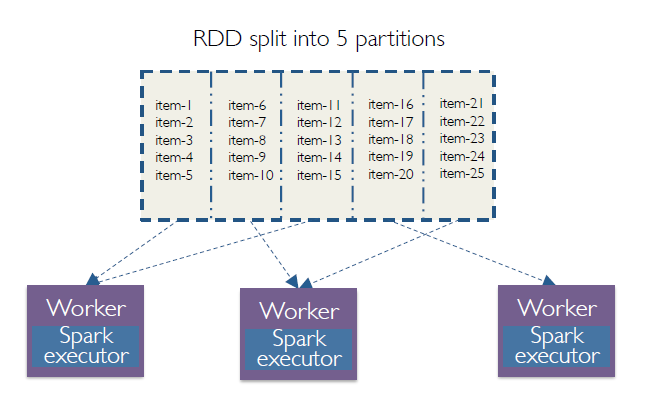

In [31]:
Image("../../media/spark_rdd.png")

In [32]:
taxi.rdd

MapPartitionsRDD[65] at javaToPython at NativeMethodAccessorImpl.java:0

## Operaciones con spark dataframes

In [33]:
mapa_columnas = {
    "VendorID": "empresa_gestora_pago",
    "tpep_pickup_datetime": "hora_recogida",
    "tpep_dropoff_datetime": "hora_llegada",
    "passenger_count": "n_pasajeros",
    "trip_distance": "distancia",
    "pickup_longitude": "lon_recogida",
    "pickup_latitude": "lat_recogida",
    "RatecodeID": "codigo_tarifa",
    "store_and_fwd_flag": "trayecto_almacenaje_en_taxi",
    "dropoff_longitude": "lon_llegada",
    "dropoff_latitude": "lat_llegada",
    "payment_type": "tipo_pago",
    "fare_amount": "tarifa",
    "surcharge": "sobrecarga",
    "mta_tax": "impuestos",
    "tolls_amount": "peajes",
    "total_amount": "coste_total",
    "tip_amount": "propina",
}
for col_original, col_nueva in mapa_columnas.items():
    taxi = taxi.withColumnRenamed(col_original, col_nueva)

In [34]:
taxi.columns

['empresa_gestora_pago',
 'hora_recogida',
 'hora_llegada',
 'n_pasajeros',
 'distancia',
 'codigo_tarifa',
 'trayecto_almacenaje_en_taxi',
 'PULocationID',
 'DOLocationID',
 'tipo_pago',
 'tarifa',
 'extra',
 'impuestos',
 'propina',
 'peajes',
 'improvement_surcharge',
 'coste_total']

In [35]:
coste_medio_por_n_pasajeros = taxi.where(
                            taxi.coste_total.isNotNull()
                        ).groupBy("n_pasajeros").mean("coste_total")

In [36]:
show(coste_medio_por_n_pasajeros)

,n_pasajeros,avg(coste_total)
0,8.0,53.501209
1,0.0,16.534555
2,7.0,51.014722
3,1.0,16.158282
4,4.0,16.879857
5,3.0,16.842591
6,2.0,17.037426
7,6.0,16.258000
8,5.0,16.356124
9,192.0,9.540000


## Spark SQL

Podemos ejecutar sql en estos dataframes y usar el módulo `spark.sql` para ejecutar SQL directamente sobre los dataframes.

Para ello tenemos que registrar "vistas", que son como tablas temporales de sql.

In [37]:
taxi.createOrReplaceTempView("viajes")

Una vez hemos creado estas vistas podemos usar sql.

In [38]:
show(spark.sql("""
  SELECT mean(propina) as propina_media, empresa_gestora_pago
  FROM viajes
  GROUP BY empresa_gestora_pago
  ORDER BY propina_media desc
  LIMIT 5
"""))

,propina_media,empresa_gestora_pago
0,1.870723,2
1,1.796591,1


In [39]:
coste_por_n_pasajeros = spark.sql("""
  SELECT mean(coste_total) as coste_medio, n_pasajeros
  FROM viajes
  GROUP BY n_pasajeros
  ORDER BY coste_medio desc
""")

In [40]:
%time show(coste_por_n_pasajeros)

,coste_medio,n_pasajeros
0,66.185134,9.0
1,53.501209,8.0
2,51.014722,7.0
3,17.037426,2.0
4,16.879857,4.0
5,16.842591,3.0
6,16.534555,0.0
7,16.356124,5.0
8,16.258000,6.0
9,16.158282,1.0


CPU times: user 15.2 ms, sys: 3.4 ms, total: 18.6 ms
Wall time: 5.61 s
